
# Prediction using Decision Tree Algorithm
# Objective: Create the Decision Tree classifier and visualize it graphically.
# Author- Kuwar Kapur

# Importing The Libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from six import StringIO  
from IPython.display import Image  
from sklearn import tree
import pydotplus

# READING THE DATA AND FINDING OUT THE UNIQUE SPECIES 

In [2]:
df=pd.read_csv('iris.csv')
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# GATHERING INFO ABOUT THE DATASET

In [18]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


# USING LABEL ENCODER FOR CATEGORICAL FEATURES 

In [5]:
lr=LabelEncoder()
df['Species']=lr.fit_transform(df['Species'])

# SPLITTING THE DATA FOR TRAINING AND TESTING

In [6]:
X=df.drop(['Species','Id'],axis=1)
y=df['Species']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# FINDING OUT THE ACCURACY USING DECISION TREE CLASSIFIER

In [13]:
DT= DecisionTreeClassifier()
Z=DT.fit(X_train,y_train)
predict=DT.predict(X_test)
print(classification_report(y_test,predict))
cm2=accuracy_score(y_test,predict)

print(cm2)
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


# VISUALISING THE DECISION TREE

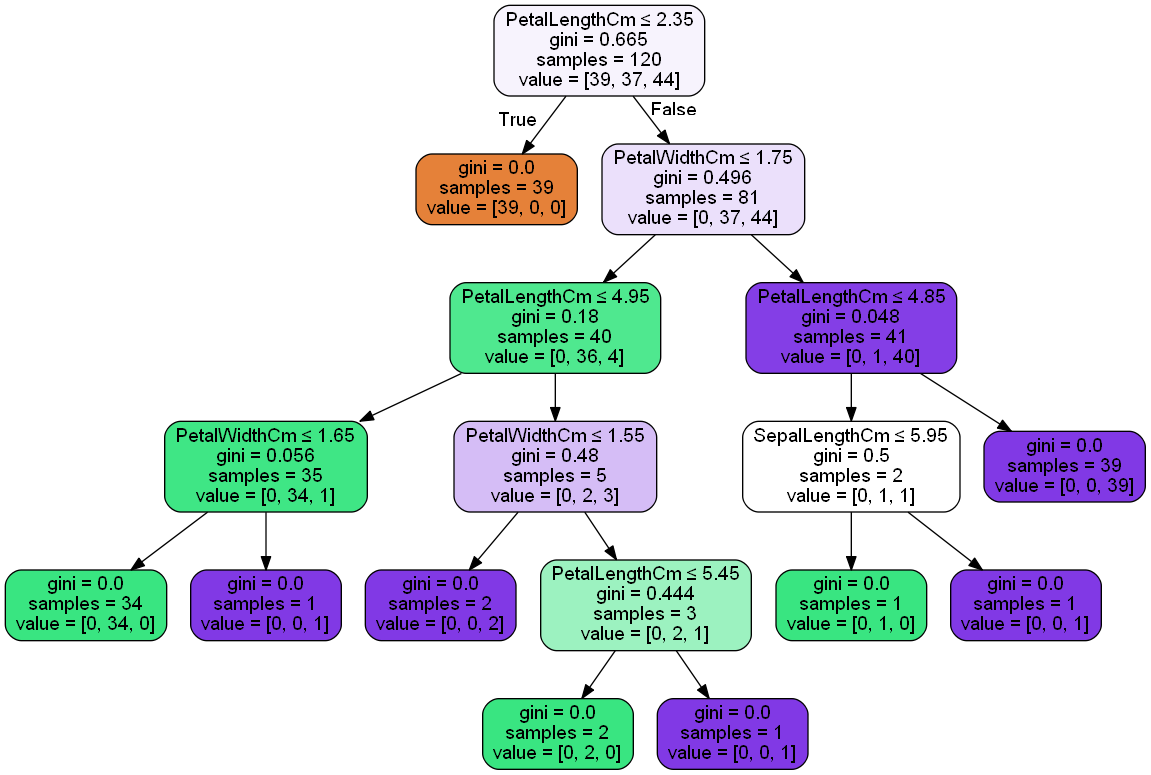

In [11]:
new_col=df.select_dtypes(include=float).columns
dot_data = StringIO()
tree.export_graphviz(DT, out_file=dot_data, feature_names=new_col,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())